In [35]:
import sys
import os

import numpy as np
from matplotlib import pyplot as plt

sys.path.append(os.path.abspath("../../utilities"))
from utilities.basis import b_spline_basis
from utilities.J_bsplines_poly import Jcb, calc_basis_matrix

def plot_b_spline_basis(k, knots):
    t_vals = np.linspace(0, 1, 10_000)
    plt.figure(figsize=(10, 6))

    for i in range(knots_num - 1):
        b_spline_vals = [b_spline_basis(t, k, i, knots) for t in t_vals]
        plt.plot(t_vals, b_spline_vals)

    plt.title('B-spline Basis Functions')
    plt.xlabel('$t$')
    plt.ylabel('Basis function value')
    plt.grid(True)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory

### Settings

In [30]:
Kx = [[3]]  # B-splines
Kb = [[2]]  # Polynomial
k_degree = 0  # Degree of the B-spline
knots_num = Kx[0][0]  # Number of knots, adjust as needed
knots = [0.]*k_degree + list(np.linspace(0, 1, knots_num - k_degree)) + [1.]*k_degree

### Visualization of B-spline basis

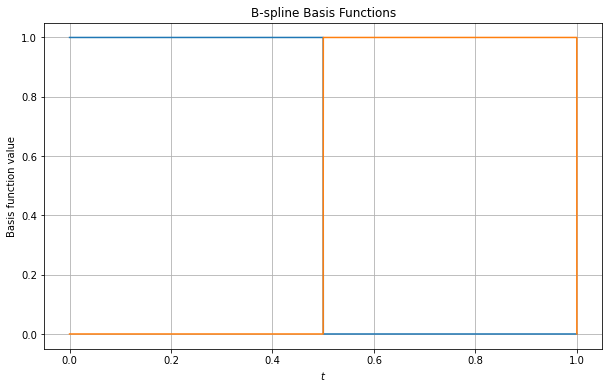

In [31]:
plot_b_spline_basis(k_degree, knots)

### Jcb calculation between b-splines and polynomials

In [34]:
J_cb_2 = np.round(Jcb(*[calc_basis_matrix(x_basis=x, b_basis=b, k=k_degree, knots_num=knots_num) for x, b in zip([Kx[0][0]-1], Kb[0])]), 3)
print(J_cb_2)

TypeError: calc_basis_matrix() got an unexpected keyword argument 'k'

### Jcb calculation between step and polynomials

In [27]:
sys.path.append(os.path.abspath("../../utilities"))
from utilities.basis import b_spline_basis
from utilities.J_step_poly import Jcb, calc_basis_matrix

J_cb = np.round(Jcb(*[calc_basis_matrix(x_basis=x, b_basis=b) for x, b in zip([Kx[0][0]-1], Kb[0])]), 3)
print(J_cb)

[[0.143 0.01  0.001]
 [0.143 0.031 0.007]
 [0.143 0.051 0.018]
 [0.143 0.071 0.036]
 [0.143 0.092 0.059]
 [0.143 0.112 0.088]
 [0.143 0.133 0.123]]


### Test

In [28]:
print(not bool((np.sum(J_cb_2 == J_cb) / J_cb.size) - 1.))

True
